In [1]:
from graph_utils import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson

# Характеристики графа влияния (vector length 6)

In [2]:
ig_ru = np.load("/Users/yuvlo/Spot-the-bot/Graph/GraphCheck/ig_ru_6.npy", allow_pickle=True).take(0)

ig_ru_6 = nx.Graph()
my_ig_ru_6 = IG(ig_ru)

edges = my_ig_ru_6.get_weighted_edges()
ig_ru_6.add_weighted_edges_from(edges)

100%|██████████████████████████████| 1888265/1888265 [00:24<00:00, 77120.64it/s]


## Распределение степеней

In [6]:
def plot_graph_degrees(degrees: list, k: int, x_max: int, y_max: int = 20000, size: tuple = (10, 8)):
    degrees = np.array(degrees)
    y = []
    xs = [x for x in range(x_max)]
    for x in xs:
        y.append(len(degrees[degrees == x]))
    plt.figure(figsize=size)
    plt.bar(x=xs, height=y)
    plt.xticks(xs, rotation=45)
    plt.grid()
    plt.title(f"Распределение степеней графа влияния при размере вектора {k}")
    plt.ylabel("Кол-во вершин")
    plt.xlabel("Кол-во соседей")
    plt.ylim(0, y_max)
    plt.show()
    return y

In [7]:
graph_degrees = my_ig_ru_6.get_graph_degrees()

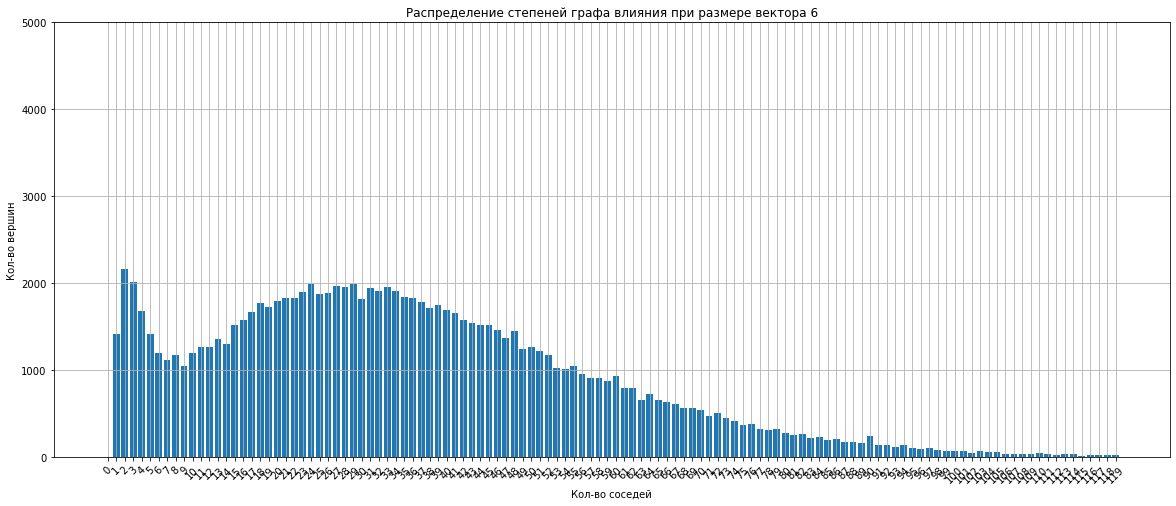

In [9]:
y = plot_graph_degrees(graph_degrees, k=6, x_max=120, y_max=5000, size=(20, 8))

In [10]:
sum(y[1:])

106167

In [14]:
nx.is_connected(ig_ru_6)

False

In [15]:
ig_c = ig_ru_6.subgraph(list(nx.connected_components(ig_ru_6))[0])

In [17]:
nx_weighted_diameter_and_radius(ig_c)

KeyboardInterrupt: 

In [19]:
d = nx.single_source_dijkstra_path_length(ig_c, 'это')

In [31]:
d['маг']

23.41830072103096

In [30]:
max(d, key=d.get)

'маг'

In [11]:
components_len = list(map(lambda component: len(component), list(nx.connected_components(ig_ru_6))))

In [12]:
components_len

[100148,
 29,
 2,
 108,
 46,
 22,
 6,
 46,
 12,
 24,
 15,
 2,
 5,
 11,
 7,
 19,
 13,
 17,
 10,
 8,
 13,
 2,
 18,
 8,
 5,
 6,
 15,
 16,
 9,
 12,
 11,
 9,
 50,
 8,
 6,
 5,
 14,
 5,
 18,
 20,
 10,
 10,
 18,
 25,
 3,
 36,
 6,
 4,
 10,
 24,
 11,
 9,
 25,
 25,
 6,
 37,
 21,
 9,
 48,
 3,
 12,
 5,
 18,
 2,
 9,
 4,
 2,
 4,
 14,
 12,
 12,
 11,
 4,
 18,
 30,
 33,
 8,
 12,
 5,
 16,
 16,
 32,
 14,
 3,
 22,
 12,
 6,
 35,
 14,
 3,
 13,
 3,
 16,
 2,
 5,
 4,
 17,
 9,
 2,
 22,
 14,
 18,
 3,
 4,
 9,
 7,
 5,
 17,
 8,
 6,
 5,
 13,
 12,
 3,
 12,
 2,
 6,
 12,
 10,
 6,
 14,
 20,
 7,
 9,
 7,
 13,
 20,
 2,
 4,
 13,
 3,
 2,
 18,
 9,
 8,
 4,
 13,
 2,
 24,
 18,
 7,
 16,
 5,
 9,
 7,
 7,
 11,
 2,
 9,
 24,
 12,
 5,
 5,
 6,
 6,
 8,
 3,
 5,
 11,
 10,
 9,
 11,
 3,
 5,
 7,
 5,
 12,
 9,
 6,
 6,
 2,
 10,
 17,
 3,
 3,
 12,
 5,
 21,
 11,
 6,
 3,
 14,
 4,
 4,
 14,
 7,
 9,
 6,
 3,
 5,
 3,
 7,
 6,
 7,
 2,
 5,
 5,
 6,
 4,
 5,
 7,
 14,
 10,
 6,
 8,
 7,
 3,
 10,
 11,
 19,
 2,
 2,
 3,
 19,
 9,
 6,
 3,
 4,
 6,
 6,
 3,
 3,
 5,
 2,
 2

## Диаметр графа

Невозможно посчитать, так как граф несвязный

## Радиус графа

Невозможно посчитать, так как граф несвязный

## Средняя длина кратчайшего пути (average shortest path length)

Невозможно посчитать, так как граф несвязный

## Распределение центральности по близости (closeness centrality)

In [39]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/ig_closeness_centrality.pickle", 'rb') as f:
    ig_cc = pickle.load(f)

In [72]:
words = list(ig_cc.keys())
values = np.array(list(ig_cc.values()))

In [76]:
len(values[values < 500])

102583

In [75]:
sorted(values)[-3800:]

[427.46568716273197,
 427.46568716273197,
 427.46568716273197,
 427.46568716273197,
 427.46568716273197,
 427.46568716273197,
 23834987486.98696,
 23834987486.98696,
 35485834724.720764,
 49140981559.096825,
 52346147274.7987,
 58073666727.64358,
 58073666727.64358,
 70971669449.44153,
 70971669449.44153,
 82758559309.11761,
 84784345457.63704,
 84784345457.63704,
 85347253071.32877,
 85347253071.32877,
 87085860267.14732,
 87752426704.76277,
 87752426704.76277,
 102084083022.01874,
 109886404723.35115,
 126683217465.21503,
 126683217465.21503,
 132475183678.78236,
 132475183678.78236,
 137375084935.5922,
 137375084935.5922,
 138966195154.03345,
 146216593335.76593,
 146216593335.76596,
 146216593335.76596,
 147538007400.77777,
 148964715396.346,
 150603335338.91122,
 159274950723.0523,
 159274950723.0523,
 160948414465.8438,
 160948414465.8438,
 162121823392.92596,
 164909616728.50464,
 164909616728.50464,
 167121213702.25104,
 167121213702.25104,
 170660481081.34195,
 170660481081.34

In [64]:
words[-900:]

['левченко',
 'космофизический',
 'швара',
 'фразистость',
 'пология',
 'ромашково',
 'соизмеряться',
 'багреева',
 'бартелеми',
 'заозерье',
 'наровчат',
 'огосударствить',
 'притоносодержатель',
 'дрейфус',
 'гюзель',
 'латифа',
 'усваивание',
 'вират',
 'чемоданова',
 'схематист',
 'гидроксид',
 'подострый',
 'схваткообразный',
 'азотирование',
 'междудеревенский',
 'нескрепленный',
 'обштопывать',
 'холодиться',
 'сиповатость',
 'абдулинский',
 'подзол',
 'люсия',
 'дзерен',
 'нвер',
 'вруб',
 'линкольновский',
 'полянское',
 'чумакова',
 'брюзгливец',
 'скиптроносный',
 'нариманов',
 'виталька',
 'межклассовый',
 'пасторель',
 'недопоставить',
 'януш',
 'псовина',
 'судопропускной',
 'батопорт',
 'мшанка',
 'болгария',
 'кормленщик',
 'восьмимиллиардный',
 'дудинский',
 'металлографический',
 'керамогранит',
 'баталова',
 'маюскульный',
 'юнонин',
 'енюша',
 'эксплозивный',
 'сгорбатить',
 'впускание',
 'газойль',
 'пироксен',
 'референтный',
 'нунциатура',
 'целин',
 'таранька',


In [59]:
ig_cc['левченко']

20.235169488121993

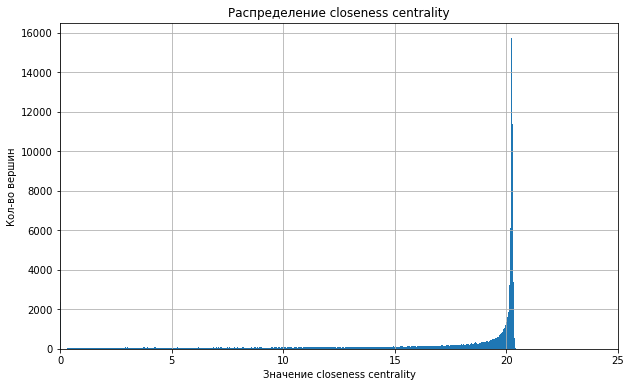

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(values[values < 500], bins=10000)
plt.xlim(0, 25)
plt.grid()
plt.title("Распределение closeness centrality")
plt.xlabel("Значение closeness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

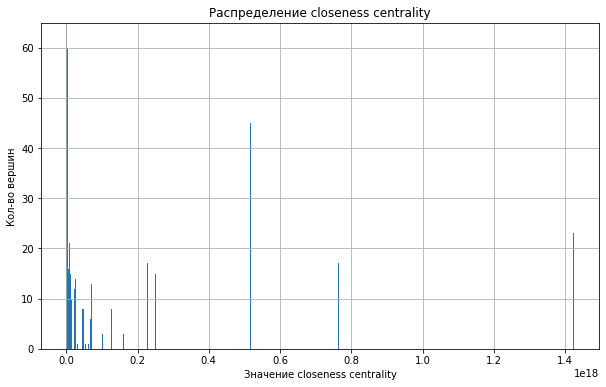

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(values[values > 500], bins=500)
plt.ylim(0, 65)
plt.grid()
plt.title("Распределение closeness centrality")
plt.xlabel("Значение closeness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Средняя степень соседей (Average Neighbor Degree)

In [158]:
av_nd = nx.average_neighbor_degree(ig_ru_6)
av_nd_w = nx.average_neighbor_degree(ig_ru_6, weight='weight')

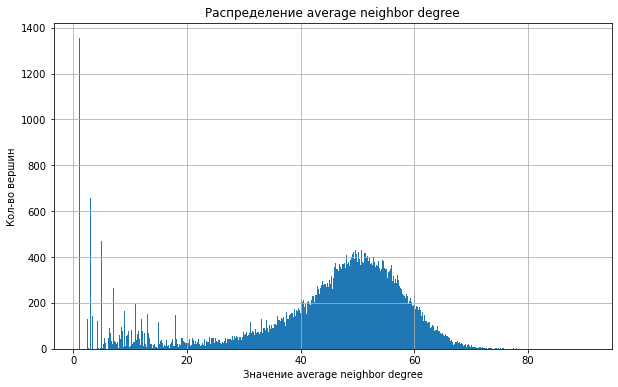

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd.values(), bins=1000)
# plt.ylim(0, 400)
plt.grid()
plt.title("Распределение average neighbor degree")
plt.xlabel("Значение average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.show()

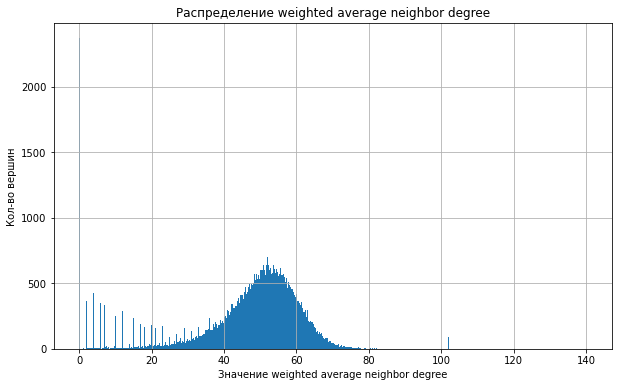

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd_w.values(), bins=1000)
# plt.ylim(0, 400)
plt.grid()
plt.title("Распределение weighted average neighbor degree")
plt.xlabel("Значение weighted average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.show()

Из этого определения следует, что $k_{nn,i}^w> k_{nn,i}$, если ребра с большими весами указывают на соседей с большей степенью. И $k_{nn,i}^w < k_{nn,i}$ для противоположного

In [164]:
more_list, less_list = [], []
for word in av_nd:
    if av_nd_w[word] > av_nd[word]:
        more_list.append(word)
    else:
        less_list.append(word)

In [165]:
len(more_list)

100341

In [166]:
len(less_list)

6036

## Центральность по близости между вершинами (vertices betweenness centrality)

In [92]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/ig_betweenness_centrality.pickle", "rb") as f:
    ig_bc = pickle.load(f)

In [95]:
values = np.array(list(ig_bc.values()))

In [96]:
values[values < 500]

array([3.71511395e-05, 4.15700043e-04, 2.35156267e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [99]:
values.tolist()

[3.715113946917928e-05,
 0.0004157000427365826,
 2.351562669241348e-05,
 1.3574004438239914e-07,
 7.843812674211959e-05,
 0.0001737850040042693,
 7.275960490282354e-05,
 2.6890770713206995e-05,
 2.0683928034939896e-05,
 3.397126718768679e-05,
 0.00012980568262985844,
 0.0011165316713771603,
 1.0863894157988377e-05,
 1.4271717924440348e-05,
 1.5537024483761034e-05,
 2.023196216033582e-05,
 3.0936634390502454e-05,
 1.0908318093472421e-05,
 0.0001904353503442947,
 0.00031978716517962316,
 5.123767315101002e-05,
 0.00010333868584028038,
 9.868043227571111e-05,
 6.802822867119742e-05,
 6.92511848744302e-05,
 6.4751653897293165e-06,
 3.43889814779006e-05,
 0.00035298860529947324,
 4.8333403272279705e-05,
 4.338234595090376e-05,
 0.00024353198459844218,
 0.0001578723676073664,
 0.00025684703360402515,
 0.0001769449485421702,
 5.0587361184692915e-05,
 6.364847430185458e-06,
 0.0003706290712982977,
 0.0004445064785153121,
 1.484073477429285e-05,
 1.920804075014122e-05,
 0.00025587984583387037,


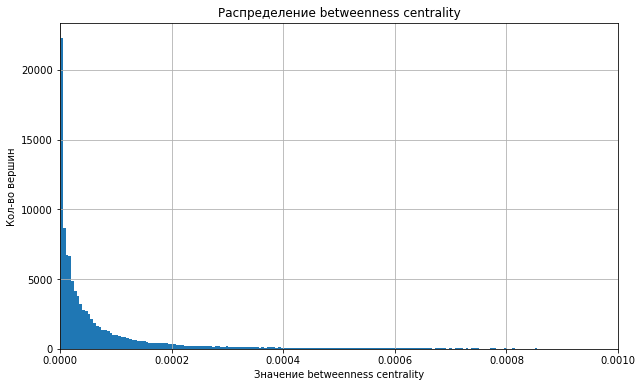

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(values[values < 0.005], bins=1000)
plt.xlim(0, 0.001)
plt.grid()
plt.title("Распределение betweenness centrality")
plt.xlabel("Значение betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Центральность по близости между ребрами (edges betweenness centrality)

In [111]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/ig_edge_betweenness_centrality.pickle", "rb") as f:
    ig_ebc = pickle.load(f)

In [130]:
values = np.array(list(ig_ebc.values()))

In [153]:
len(values[values < 0.00005])

1830242

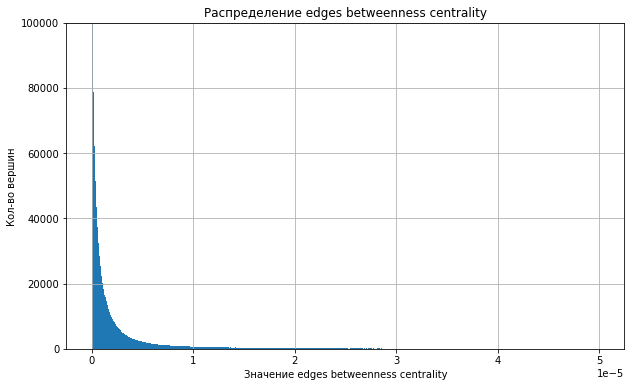

In [155]:
plt.figure(figsize=(10, 6))
plt.hist(values[values < 0.00005], bins=1000)
plt.ylim(0, 100000)
# plt.xlim(0, 1)
plt.grid()
plt.title("Распределение edges betweenness centrality")
plt.xlabel("Значение edges betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

In [156]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/ig_load_centrality.pickle", "rb") as f:
    ig_load = pickle.load(f)

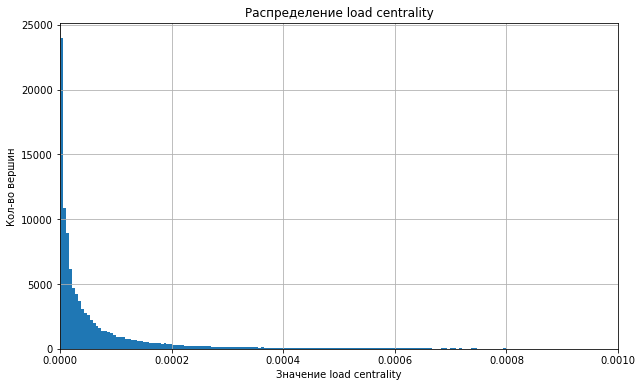

In [157]:
plt.figure(figsize=(10, 6))
plt.hist(ig_load.values(), bins=1000)
# plt.ylim(0, 1000)
plt.xlim(0, 0.001)
plt.grid()
plt.title("Распределение load centrality")
plt.xlabel("Значение load centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Коэффициент кластеризации (взвешенный и невзвешенный)

In [28]:
cc = nx.algorithms.clustering(ig_ru_6)

In [29]:
cc_w = nx.algorithms.clustering(ig_ru_6, weight='weight')

In [30]:
more_list, less_list = [], []
for word in cc:
    if cc_w[word] > cc[word]:
        more_list.append(word)
    else:
        less_list.append(word)

In [31]:
len(more_list)

0

In [32]:
len(less_list)

106377

## Средний коэффициент кластеризации (взвешенный и невзвешенный)

In [167]:
cc = nx.clustering(ig_ru_6)

In [168]:
w_cc = nx.clustering(ig_ru_6, weight='weight')

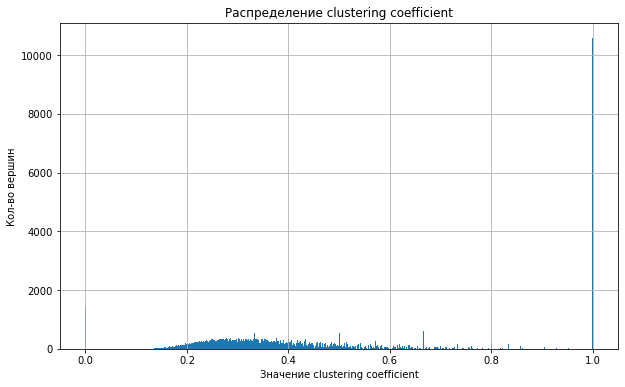

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(cc.values(), bins=1000)
# plt.ylim(0, 1200)
plt.grid()
plt.title("Распределение clustering coefficient")
plt.xlabel("Значение clustering coefficient")
plt.ylabel("Кол-во вершин")
plt.show()

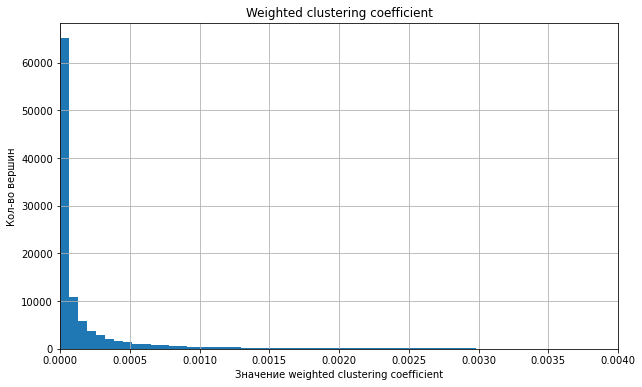

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(w_cc.values(), bins=10000)
# plt.ylim(0, )
plt.xlim(0, 0.004)
plt.grid()
plt.title("Weighted clustering coefficient")
plt.xlabel("Значение weighted clustering coefficient")
plt.ylabel("Кол-во вершин")
plt.show()

In [171]:
nx.average_clustering(ig_ru_6)

0.4315053257736839

In [172]:
nx.average_clustering(ig_ru_6, weight='weight')

0.0004133032176574334

In [4]:
nds = list(ig_ru_6.nodes)[:10000]

In [5]:
nx.degree_assortativity_coefficient(ig_ru_6, weight='weight', nodes=nds)

0.783673722374167

In [6]:
rc = nx.rich_club_coefficient(ig_ru_6, normalized=False)

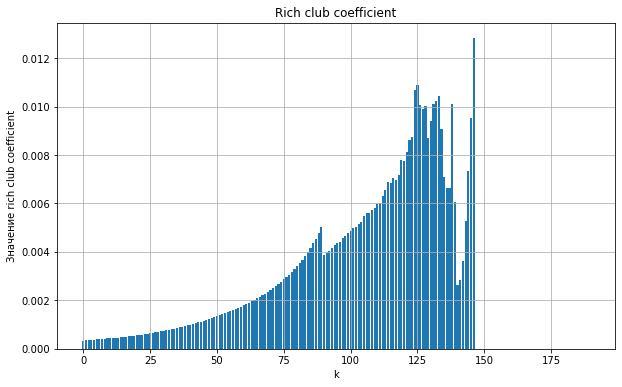

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(x=rc.keys(), height=rc.values())
plt.grid()
plt.title("Rich club coefficient")
plt.xlabel("k")
plt.ylabel("Значение rich club coefficient")
plt.show()